# Data Voorbereiden van FoodBoost project

Voor het FoodBoost project hebben we vier verschillende datasets gekregen van de Allerhande. Deze bevatten informatie over de recepten die zij op de website hebben staan. Het doel voor dit project is om op basis van iemands zeven favorieten recepten een nieuw recept aan te bevelen. De doelgroep waarover het gaat zijn studenten die een speciaal dieet volgen. Hieronder vallen de tags: hoofdgerecht, snel, budget, vegetarisch of lactosevrij of glutenvrij.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

## 1) inlezen van data

In [3]:
!ls /data/foodboost

ingredients.csv  nutritions.csv  recipes.csv  tags.csv


In [4]:
ingredients = pd.read_csv('/data/foodboost/ingredients.csv', index_col =0)
nutritions = pd.read_csv('/data/foodboost/nutritions.csv', index_col =0)
recipes = pd.read_csv('/data/foodboost/recipes.csv', index_col=0)
tags = pd.read_csv('/data/foodboost/tags.csv', index_col =0)

De ingredienten dataset bevat per recept welke ingredienten nodig zijn, hoeveel hiervan nodig is, en in welke hoeveelheid dit is.

In [5]:
ingredients

,recipe,ingredient,quantity,unit
0,Kruidnoten met choco-discodip,melkchocolade,100.0,g
1,Kruidnoten met choco-discodip,kruidnoten,100.0,g
2,Kruidnoten met choco-discodip,discodip,2.0,el
3,Kruidnoten in marsepein,blanke marsepein,150.0,g
4,Kruidnoten in marsepein,ongezouten roomboter,15.0,g
...,...,...,...,...
71804,Biefstuk met rodewijnsaus en ham,olijfolie,4.0,el
71805,Biefstuk met rodewijnsaus en ham,biefstukken,4.0,NaN
71806,Biefstuk met rodewijnsaus en ham,boter,25.0,g
71807,Biefstuk met rodewijnsaus en ham,serranoham,4.0,plakken


In de nutitions dataset staat per recept welke nutritions hierin zitten en hoeveel

In [6]:
nutritions

,recipe,nutrition,value
0,Kruidnoten met choco-discodip,energie,260 kcal
1,Kruidnoten met choco-discodip,koolhydraten,34 g
2,Kruidnoten met choco-discodip,waarvan suikers,22 g
3,Kruidnoten met choco-discodip,natrium,200 mg
4,Kruidnoten met choco-discodip,eiwit,3 g
...,...,...,...
58760,Pittige truffels,waarvan verzadigd,0 g
58761,Biefstuk met rodewijnsaus en ham,energie,360 kcal
58762,Biefstuk met rodewijnsaus en ham,koolhydraten,2 g
58763,Biefstuk met rodewijnsaus en ham,eiwit,28 g


In de recipes dataset staat voor hoeveel mensen een recept is, hoelang het duur, hoeveel calorieren het bevat en eventueel hoeveel sterren het heeft gekregen. Daarnaast is er nog een link te vinden naar het recept op de allerhande zelf samen met een foto van het gerecht

In [7]:
recipes

,title,persons,time,calories,stars,url,image
0,Kruidnoten met choco-discodip,4,25,260,0,https://www.ah.nl/allerhande/recept/R-R1195893...,https://static.ah.nl/static/recepten/img_RAM_P...
0,Kruidnoten in marsepein,4,25,265,0,https://www.ah.nl/allerhande/recept/R-R1195892...,https://static.ah.nl/static/recepten/img_RAM_P...
0,Kruidnoten met chocodips,4,25,335,0,https://www.ah.nl/allerhande/recept/R-R1195891...,https://static.ah.nl/static/recepten/img_RAM_P...
0,Pepernotentaart met marsepeinstrik,10,30,560,0,https://www.ah.nl/allerhande/recept/R-R1195887...,https://static.ah.nl/static/recepten/img_RAM_P...
0,Perencake,12,10,265,0,https://www.ah.nl/allerhande/recept/R-R1195790...,https://static.ah.nl/static/recepten/img_RAM_P...
...,...,...,...,...,...,...,...
0,Paddenstoelen en courgettegratin,4,15,285,0,https://www.ah.nl/allerhande/recept/R-R749694/...,https://static.ah.nl/static/recepten/img_00758...
0,Peren-amandelcoupe,2,15,160,0,https://www.ah.nl/allerhande/recept/R-R749692/...,https://static.ah.nl/static/recepten/img_00757...
0,Ceviche met sint-jakobsschelpen,4,120,210,0,https://www.ah.nl/allerhande/recept/R-R749684/...,https://static.ah.nl/static/recepten/img_00763...
0,Pittige truffels,25,70,65,0,https://www.ah.nl/allerhande/recept/R-R749680/...,https://static.ah.nl/static/recepten/img_00763...


In de tags dataset staat per recept welke tags het heeft

In [8]:
tags

,recipe,tag
0,Kruidnoten met choco-discodip,hollands
1,Kruidnoten met choco-discodip,gebak
2,Kruidnoten met choco-discodip,gebak
3,Kruidnoten met choco-discodip,sinterklaas
4,Kruidnoten met choco-discodip,sinterklaasavond
...,...,...
46035,Pittige truffels,nagerecht
46036,Biefstuk met rodewijnsaus en ham,snel
46037,Biefstuk met rodewijnsaus en ham,mediterraan
46038,Biefstuk met rodewijnsaus en ham,hoofdgerecht


## 2) Analyseren van de data

In [9]:
aantal_ingredienten={}

for ingr in ingredients["ingredient"]:
    if ingr in aantal_ingredienten.keys():
        aantal_ingredienten[ingr] += 1
    else:
        aantal_ingredienten[ingr] = 1

aantal_ingredienten = dict(sorted(aantal_ingredienten.items(),
                           key=lambda item: item[1],
                           reverse=True))
print(aantal_ingredienten)

{'knoflook': 1989, 'traditionele olijfolie': 1500, 'middelgroot ei': 1452, 'ongezouten roomboter': 1348, 'citroen': 968, 'milde olijfolie': 901, 'water': 730, 'zout': 721, 'arachideolie': 690, 'tarwebloem': 628, 'ui': 585, 'limoen': 580, 'kraanwater': 571, 'rode ui': 569, 'zonnebloemolie': 540, 'verse platte peterselie': 502, 'verse koriander': 437, 'halfvolle melk': 409, 'verse munt': 408, 'verse basilicum': 393, 'verse gember': 391, 'komkommer': 387, 'crème fraîche': 358, 'courgette': 355, 'kristalsuiker': 348, 'winterpeen': 343, 'verse slagroom': 339, 'sjalot': 330, 'rode peper': 316, 'rucola': 294, 'middelgrote ui': 285, 'olijfolie': 283, 'mayonaise': 273, 'cherrytomaten': 269, 'extra vierge olijfolie': 269, 'vloeibare honing': 265, 'fijne kristalsuiker': 244, 'verse bieslook': 243, 'verse tijm': 239, 'poedersuiker': 238, 'bosui': 233, 'verse spinazie': 226, 'rode paprika': 225, 'eetrijpe avocado': 224, 'gemalen kaneel': 215, 'bakpoeder': 211, 'sesamolie': 211, 'kokosmelk': 206, 'b

In [10]:
print(f'Er zijn {len(aantal_ingredienten)} verschillende soorten ingredienten')

Er zijn 7204 verschillende soorten ingredienten


In [11]:
units_ingredienten={}

for ingr in ingredients["unit"]:
    if ingr in units_ingredienten.keys():
        units_ingredienten[ingr] += 1
    else:
        units_ingredienten[ingr] = 1

units_ingredienten = dict(sorted(units_ingredienten.items(),
                           key=lambda item: item[1],
                           reverse=True))
print(units_ingredienten)

{'g': 28840, nan: 14300, 'el': 11963, 'ml': 4410, 'tl': 4122, 'teen': 1843, 'kg': 770, 'bakje': 510, 'liter': 489, 'takje': 408, 'cm': 372, 'zak': 249, 'sneetje': 244, 'mespunt': 239, 'plakje': 185, 'schaal': 185, 'stengel': 169, 'zakje': 167, 'stuk': 145, 'pak': 136, 'blaadje': 131, 'plak': 110, 'bosje': 106, 'tenen': 106, 'pakje': 93, 'blik': 86, 'potje': 76, 'bol': 71, 'krop': 69, 'kropje': 61, 'stronk': 61, 'struik': 60, 'bos': 59, 'bekertje': 54, 'beker': 45, 'blikje': 42, 'pot': 35, 'snee': 34, 'snufje': 33, 'sneetjes': 30, 'bakjes': 29, 'bak': 26, 'vel': 25, 'zakken': 24, 'schaaltjes': 24, 'plakjes': 24, 'bolletje': 22, 'pakjes': 22, 'zakjes': 22, 'flesje': 21, 'takjes': 20, 'tablet': 18, 'stukje': 16, 'fles': 16, 'blaadjes': 16, 'plakken': 16, 'druppel': 15, 'stengels': 15, 'portie': 14, 'blikken': 14, 'tube': 13, 'doosje': 13, 'duopak': 13, 'rol': 12, 'blikjes': 12, 'bolletjes': 12, 'kleine': 11, 'x 2 stuks': 9, 'stick': 7, 'sachet': 7, 'schaaltje': 7, 'hele': 7, 'sprietje': 6

In [12]:
print(f'Er zijn {len(units_ingredienten)} verschillende soorten units die voor de hoeveelheid ingredienten wordt gebruikt')

Er zijn 155 verschillende soorten units die voor de hoeveelheid ingredienten wordt gebruikt


In [13]:
aantal_nut = {}
for tag in nutritions["nutrition"]:
    if tag in aantal_nut.keys():
        aantal_nut[tag] += 1
    else:
        aantal_nut[tag] = 1

print(aantal_nut)

{'energie': 8706, 'koolhydraten': 8663, 'waarvan suikers': 1853, 'natrium': 7302, 'eiwit': 8596, 'vet': 8480, 'waarvan verzadigd': 7992, 'vezels': 7173}


In [14]:
print(f'Er zijn {len(aantal_nut)} verschillende soorten nutritions')

Er zijn 8 verschillende soorten nutritions


In [15]:
aantal_tags = {}
for tag in tags["tag"]:
    if tag in aantal_tags.keys():
        aantal_tags[tag] += 1
    else:
        aantal_tags[tag] = 1
aantal_tags = dict(sorted(aantal_tags.items(),
                           key=lambda item: item[1],
                           reverse=True))
print(aantal_tags)

{'hoofdgerecht': 4595, 'wat eten we vandaag': 2768, 'oven': 2542, 'lactosevrij': 1923, 'glutenvrij': 1679, 'koken': 1588, 'bakken': 1495, 'vegetarisch': 1435, 'gebak': 1291, 'bijgerecht': 1277, 'vooraf te maken': 1250, 'kerst': 1118, 'italiaans': 1071, 'snel': 848, 'hollands': 827, 'aziatisch': 822, 'zonder vlees/vis': 789, 'pasta': 762, 'budget': 762, 'lunch': 717, 'nagerecht': 649, 'salade': 649, 'borrel': 627, 'grillen': 620, 'borrelhapje': 573, 'brood/sandwiches': 557, 'slank': 505, 'pasen': 500, 'barbecue': 482, 'veganistisch': 437, 'rijst': 435, 'ontbijt': 423, 'verjaardag': 398, 'soep': 380, 'roerbakken/wokken': 379, 'brunch': 375, 'picknick': 352, 'mediterraan': 348, 'gezond': 347, 'voorgerecht': 346, 'keukenmachine': 323, 'stoven': 304, '5-ingrediënten': 289, 'oud &amp; nieuw': 283, 'frans': 267, 'amerikaans': 248, 'mexicaans': 243, 'maaltijdsoep': 239, 'kinderrecepten': 225, 'moederdag': 221, 'stamppot': 216, 'zonder vlees': 210, 'tussendoortje': 206, 'traktatie': 199, 'in te

In [16]:
print(f'Er zijn {len(aantal_tags)} verschillende soorten tags')

Er zijn 118 verschillende soorten tags


## 3) Omgaan met missing data

#### ingredienten

In [17]:
ingredients.isna().sum()

recipe            0
ingredient        0
quantity          0
unit          14300
dtype: int64

In [18]:
print(ingredients.loc[ingredients.isna().any(axis=1)])

                                   recipe       ingredient  quantity unit
16     Pepernotentaart met marsepeinstrik   middelgroot ei       3.0  NaN
23                              Perencake   middelgroot ei       3.0  NaN
31                              Perencake  Conference peer       3.0  NaN
35                         Massaman curry      laurierblad       3.0  NaN
36                         Massaman curry        steranijs       2.0  NaN
...                                   ...              ...       ...  ...
71792     Ceviche met sint-jakobsschelpen         limoenen       2.0  NaN
71793     Ceviche met sint-jakobsschelpen  rode grapefruit       1.0  NaN
71795     Ceviche met sint-jakobsschelpen          avocado       1.0  NaN
71797                    Pittige truffels       rode peper       2.0  NaN
71805    Biefstuk met rodewijnsaus en ham      biefstukken       4.0  NaN

[14300 rows x 4 columns]


De missing data komt vanwege het feit dat het om 1 bepaald product gaat en dus geen hoeveelheid is, vandaar dat NaN wordt omgezet naar -, dit staat nog niet tussen de unit lijst

In [19]:
ingredients = ingredients.fillna('-')

In [20]:
ingredients

,recipe,ingredient,quantity,unit
0,Kruidnoten met choco-discodip,melkchocolade,100.0,g
1,Kruidnoten met choco-discodip,kruidnoten,100.0,g
2,Kruidnoten met choco-discodip,discodip,2.0,el
3,Kruidnoten in marsepein,blanke marsepein,150.0,g
4,Kruidnoten in marsepein,ongezouten roomboter,15.0,g
...,...,...,...,...
71804,Biefstuk met rodewijnsaus en ham,olijfolie,4.0,el
71805,Biefstuk met rodewijnsaus en ham,biefstukken,4.0,-
71806,Biefstuk met rodewijnsaus en ham,boter,25.0,g
71807,Biefstuk met rodewijnsaus en ham,serranoham,4.0,plakken


#### nutritions

In [21]:
nutritions.isna().sum()

recipe       0
nutrition    0
value        0
dtype: int64

#### recipes

In [22]:
recipes.isna().sum()

title       0
persons     0
time        0
calories    0
stars       0
url         0
image       0
dtype: int64

#### tags

In [23]:
tags.isna().sum()

recipe    0
tag       0
dtype: int64

## 4) Visualiseren van de data

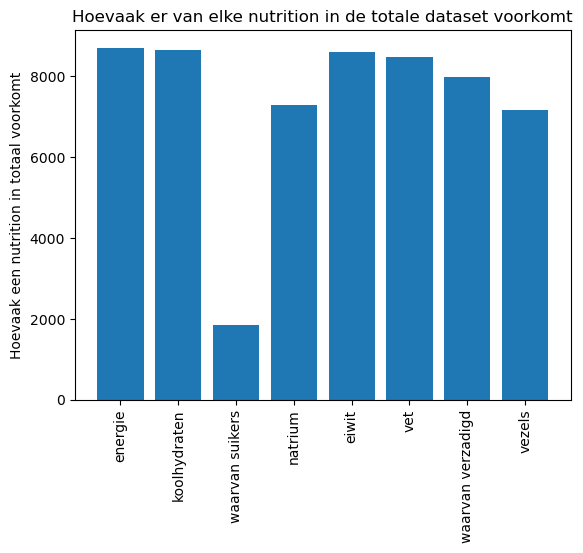

In [24]:
nut = list(aantal_nut.keys())
nut_values = list(aantal_nut.values())

plt.bar(range(len(aantal_nut)), nut_values, tick_label=nut)
plt.title('Hoevaak er van elke nutrition in de totale dataset voorkomt')
plt.ylabel('Hoevaak een nutrition in totaal voorkomt')
plt.xticks(rotation = 90)
plt.show()

# Maken dataset voor voorspellingen

Om uiteindelijk een nieuw recept aan een gebruiker aan te bevelen worden er verschillende gebruikers gesimuleerd. De doelgroep zijn studenten die een speciaal dieet volgen. De tags die worden gebruikt zijn: hoofdgerecht, snel, budget, vegetarisch/lactosevrij/glutenvrij. Om te weten of een voorspelling goed of fout is word er per gebruiker 6 favorieten recepten aangegeven en 1 voorspelrecept als dit voorspelrecept dezelfde tag (vega/lactosevrij/glutenvrij) bevat als de favoriete recepten dan is dit een goed voorbeeld. Is dit niet het geval, dus de 6 favorieten recepten hebben een andere tag dan het voorspelgerecht, dan is het een slecht voorbeeld. Het voorspelmodel heeft deze goede en slechte voorbeelden nodig om uiteindelijk voorspellingen te kunnen doen, het zou anders geen onderscheid kunnen maken tussen wat goed en wat fout is.

Een ander notebook moet eerst gerund worden om de functie select_recept_meertags te gebruiken. Deze functie selecteert alle recepten die de opgegeven tags bevatten

In [25]:
%run importHeaders-Copy1.ipynb  

ingredients.csv  nutritions.csv  recipes.csv  tags.csv


### goede voorbeelden

In [26]:
mogelijke_tags = ['vegetarisch', 'lactosevrij', 'glutenvrij']

Voor het maken van de goede voorbeelden wordt er uit de lijst mogelijke tags eerst een random tag gekozen. Alle recepeten die dan die tag samen met hoofdgerecht, snel en budget hebben komen in de recepten lijst te staan. Vervolgens worden hier 7 random recepten uitgekozen. Uiteindelijk wordt dit in het dataframe gezet.

Voor dit voorbeeld zijn 50 gebruikers aangemaakt om een duidelijk beeld te krijgen wat er tijdens welke stappen gebeurt, dit kan makkelijk worden aangepast om zo een grote dataset te maken

In [27]:
aantal_gebruikers=50

In [28]:
df = pd.DataFrame({'ID':[], 'Recepten':[], 'Value':[], "Tag":[]})
for i in range(aantal_gebruikers):
    random_tag = random.choice(mogelijke_tags)
    recepten_lijst = select_recept_meertags('hoofdgerecht', 'snel', 'budget', random_tag)

    recepten_lijst_new = random.sample(recepten_lijst, k =7)

    for recept in recepten_lijst_new:
        new = pd.DataFrame({'ID':[i], 'Recepten':[recept], 'Value':[1], "Tag":[random_tag]})
        df = pd.concat([df,new], ignore_index = True )

In [29]:
df

,ID,Recepten,Value,Tag
0,0.0,Spinazie-couscoussalade met ei,1.0,vegetarisch
1,0.0,Aziatische noedelsalade met tofu,1.0,vegetarisch
2,0.0,Spinaziecurry met ei,1.0,vegetarisch
3,0.0,Rijstsalade met edamame bonen,1.0,vegetarisch
4,0.0,Pitabroodjes met gebakken groenten en geitenkaas,1.0,vegetarisch
...,...,...,...,...
345,49.0,Pita falafel met zoetzure biet en knoflooksaus,1.0,lactosevrij
346,49.0,Pita vegan shoarma met srirachamayo,1.0,lactosevrij
347,49.0,Spinazie-couscoussalade met ei,1.0,lactosevrij
348,49.0,Aziatische noedelsalade met tofu,1.0,lactosevrij


Om aan te geven welke recepten de favorieten recepten zijn en welke het recept is dat voorspeld moet worden wordt er geloopt over het dataframe. Hierbij wordt elk gerecht van gebruiker x 1 keer het voorspelrecept. Voor de title van dit recept wordt Voorspel_ gezet en wordt vervolgens in het dataframe voorspel_favo gesplaatst. Daarna worden de andere recepeten in het dataframe geplaatst met voor de titel Favo_. Dit gaat zo alle gebruikers langs totdat dus elk recept 1 keer als voorspelrecept is gemaakt.

In [30]:
voorspel_favo = pd.DataFrame([], columns=df.columns)
for i in range(len(df)):
    id = df["ID"][i]
    ID = i

#     print("ID:", id)
#     print("voorspelrecept ", df.Recepten[i])
    voorspel_favo.loc[len(voorspel_favo)] = ID, 'voorspel_' + df.Recepten[i], 1, df.Tag[i]
    
    for ander_recept in df[df.ID==id].Recepten:
        if ander_recept != df.Recepten[i]:
#             print("favorecept ", ander_recept)
            voorspel_favo.loc[len(voorspel_favo)] = ID, 'favo_' + ander_recept, 1, df.Tag[i]

In [31]:
voorspel_favo

,ID,Recepten,Value,Tag
0,0,voorspel_Spinazie-couscoussalade met ei,1,vegetarisch
1,0,favo_Aziatische noedelsalade met tofu,1,vegetarisch
2,0,favo_Spinaziecurry met ei,1,vegetarisch
3,0,favo_Rijstsalade met edamame bonen,1,vegetarisch
4,0,favo_Pitabroodjes met gebakken groenten en gei...,1,vegetarisch
...,...,...,...,...
2445,349,favo_Komkommerroerbak met sesam &amp; omelet,1,lactosevrij
2446,349,favo_Pita falafel met zoetzure biet en knofloo...,1,lactosevrij
2447,349,favo_Pita vegan shoarma met srirachamayo,1,lactosevrij
2448,349,favo_Spinazie-couscoussalade met ei,1,lactosevrij


De dataframe moet nu zo omgezet worden dat alle recepten als nieuwe colom worden toegevoegd. Er komt dan een 1 te staan bij de recepten die van toepassing zijn op het dieet van de gebruiker

In [32]:
simulatie = voorspel_favo.pivot(index='ID', columns='Recepten', values='Value').fillna(0)

Tot slot wordt er een target kolom toegevoegd met waarde 1, gezien dit nu allemaal goede voorspellingen zijn

In [33]:
simulatie["target"] = 1
simulatie

Recepten,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
347,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### slechte voorbeelden

ik wil dus een kopie van de dataframe met de goede recepten. Waar voorspel bij staat moet een ander gerecht worden. Dit andere gerecht wordt dan gekozen op basis van een andere tag

In [34]:
slecht = pd.DataFrame([], columns=voorspel_favo.columns)
for i in range(len(voorspel_favo)):
    id = voorspel_favo.ID[i]
    if voorspel_favo.Recepten[i][0:8] == 'voorspel':
        random_tag = random.choice(mogelijke_tags)
        recepten_lijst = select_recept_meertags('hoofdgerecht', 'budget', 'snel', random_tag)
        while random_tag == voorspel_favo.Tag[i]:
            random_tag = random.choice(mogelijke_tags)
            recepten_lijst = select_recept_meertags('hoofdgerecht', 'budget', 'snel', random_tag)
        recepten_lijst_new = random.sample(recepten_lijst, k =1)
        slecht.loc[len(slecht)] = id, 'voorspel_' + recepten_lijst_new[0], 1, random_tag
    else:
        slecht.loc[len(slecht)] = id, voorspel_favo.Recepten[i], 1, voorspel_favo.Tag[i]

In [35]:
slecht

,ID,Recepten,Value,Tag
0,0,voorspel_Zomerse chili con carne,1,glutenvrij
1,0,favo_Aziatische noedelsalade met tofu,1,vegetarisch
2,0,favo_Spinaziecurry met ei,1,vegetarisch
3,0,favo_Rijstsalade met edamame bonen,1,vegetarisch
4,0,favo_Pitabroodjes met gebakken groenten en gei...,1,vegetarisch
...,...,...,...,...
2445,349,favo_Komkommerroerbak met sesam &amp; omelet,1,lactosevrij
2446,349,favo_Pita falafel met zoetzure biet en knofloo...,1,lactosevrij
2447,349,favo_Pita vegan shoarma met srirachamayo,1,lactosevrij
2448,349,favo_Spinazie-couscoussalade met ei,1,lactosevrij


In [36]:
print('aantal tags goede voorbeelden: \n',voorspel_favo['Tag'].value_counts())
print('aantal tags slechte voorbeelden: \n',slecht['Tag'].value_counts())

aantal tags goede voorbeelden: 
 glutenvrij     1176
lactosevrij     735
vegetarisch     539
Name: Tag, dtype: int64
aantal tags slechte voorbeelden: 
 glutenvrij     1099
lactosevrij     755
vegetarisch     596
Name: Tag, dtype: int64


In [37]:
simulatie_slecht = slecht.pivot(index='ID', columns='Recepten', values='Value').fillna(0)

Nu wordt nog de target kolom met waarde 0 toegevoegd om aan te geven dat het om slechte voorbeelden gaat

In [39]:
simulatie_slecht["target"] = 0
simulatie_slecht

Recepten,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
347,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### samenvoegen

Tot slot moeten de goede en slechte voorbeelden nog bij elkaar worden gevoegd, om zo een volledige dataset te maken

De slechte voorbeelden krijgen het id nummers dat na de goede voorbeelden komt

In [42]:
ID = [*range(len(simulatie), len(simulatie)+len(simulatie_slecht))]

In [43]:
simulatie_slecht['ID']=ID
simulatie_slecht = simulatie_slecht.set_index(["ID"])

In [44]:
simulatie

Recepten,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
ID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
347,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [45]:
simulatie_totaal = pd.concat([simulatie,simulatie_slecht], ignore_index = True )

## Uiteindelijke dataset

In [46]:
simulatie_totaal

Recepten,favo_Aziatische noedelsalade met tofu,favo_Aziatische roerbak met varkenssaté,favo_Champignonragout met groene asperges,favo_Chinese balletjes in zoetzure saus,favo_Eenpansnoedels met vega kip en wokgroente,"favo_Falafel-quinoaburger met zuivelspread, slamelange, rode biet en komkommer",favo_Gebakken gnocchi met spekjes en spruitjes,favo_Groenten in Thaise currysaus,favo_Hoisinnoedels met gehakt en groene groenten,favo_Kip roerbak met sperziebonen en rijst,...,voorspel_Spinazie-couscoussalade met ei,voorspel_Spinaziecurry met ei,voorspel_Supersnel rijstpannetje met tuinbonen,voorspel_Tomaten-tuinbonensalade,voorspel_Vegan curry met pitabroodjes,voorspel_Vegetarische wokschotel met bloemkoolrijst en sweet chilisaus,"voorspel_Volkorenpasta met kip, Chinese kool, gember en tahin",voorspel_Wokschotel met verse-kaasblokjes,voorspel_Zomerse chili con carne,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
696,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
697,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
698,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
